In [59]:
import datetime
import numpy
import os
from matplotlib import pyplot as plt
import matplotlib

In [60]:
#file paths
s_path = os.path.join(os.path.expanduser('~'), 'Documents', 'Talent Games', 
  'analytics', 'FB_stocks_year.txt')
c_path = os.path.join(os.path.expanduser('~'), 'Documents', 'Talent Games', 
  'analytics', 'FB_commits_year.txt')

In [61]:
start_year = 2017
date_list = []
stocks_raw = []
commits_raw = []
stocks_list = []
commits_list = []
day_of_year_list = []
with open(s_path) as s:
  stocks_raw = s.readlines()
with open(c_path) as c:
  commits_raw = c.readlines()

In [62]:
#stocks
for i in stocks_raw:
  line = i.split("\t")
  date_string = line[0]
  date_list.append(date_string)
  dt = datetime.datetime.strptime(date_string,"%Y-%m-%d")
  dt0 = datetime.datetime(start_year, 2, 1)
  day_of_year = (dt - dt0).days
  day_of_year_list.append(day_of_year)
  stock = float(line[1])
  stocks_list.append(stock)

In [63]:
#commits
for i in commits_raw:
  line = i.split("\t")
  date_string = line[0]
  commits = float(line[1])
  if date_string in date_list:
    if (commits > 3000):
        commits = 200
    commits_list.insert(date_list.index(date_string), commits)
for i in range (0, len(commits_list)):
    if commits_list[i] == None:
        commmits_list[i] = 0

No handles with labels found to put in legend.


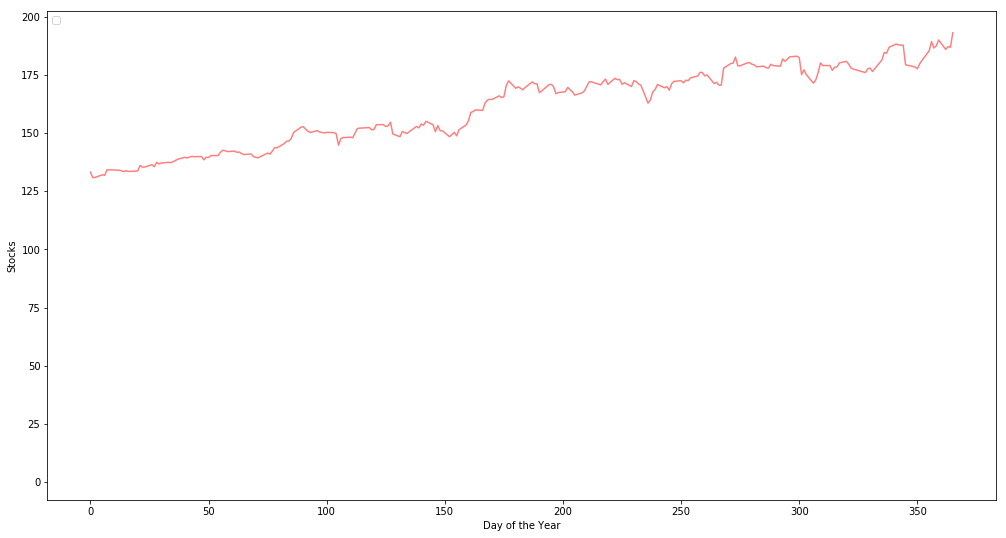

No handles with labels found to put in legend.


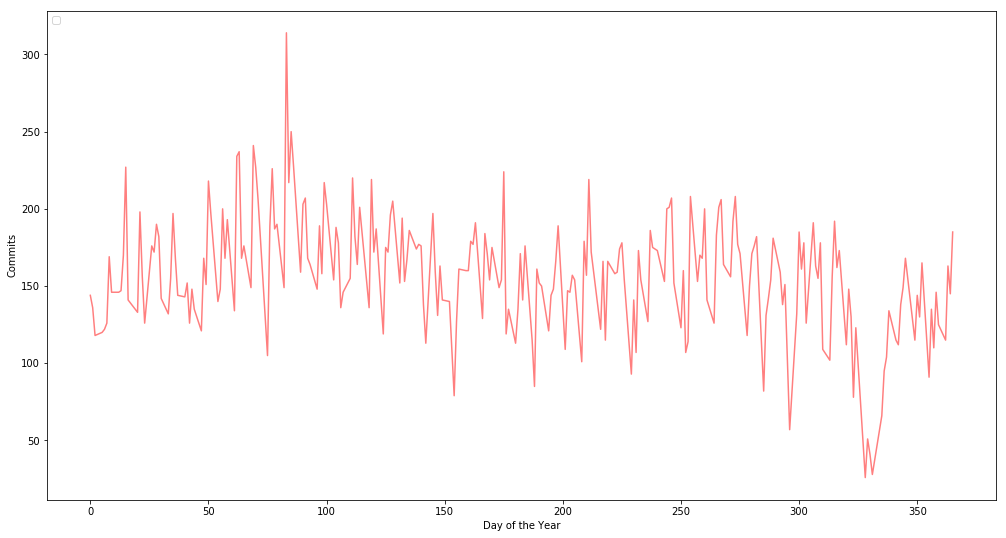

In [64]:
fig_size = plt.rcParams["figure.figsize"]
fig_size[0] = 17
fig_size[1] = 9
plt.rcParams["figure.figsize"] = fig_size

plt.plot(day_of_year_list, stocks_list, 2, c="red", alpha=0.5)
plt.xlabel("Day of the Year")
plt.ylabel("Stocks")
plt.legend(loc=2)
plt.show()

plt.plot(day_of_year_list, commits_list, 200, c="red", alpha=0.5)
plt.xlabel("Day of the Year")
plt.ylabel("Commits")
plt.legend(loc=2)
plt.show()